# Matplotlib bar chart storytelling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb 
from constants import GRAY_1,GRAY_2,GRAY_3,BLUE_1

df = pd.read_csv('data/norway_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
df_quantity_brand = duckdb.query("""--sql
                                 Select
                                    make as brand,
                                    Sum(quantity) as Quantity,
                                    from df
                                    group by Brand
                                    order by quantity desc
                                 """).df().set_index('brand')

df_quantity_brand


,Quantity
brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Tata,1.0
Martin Motors,1.0
Secma,1.0


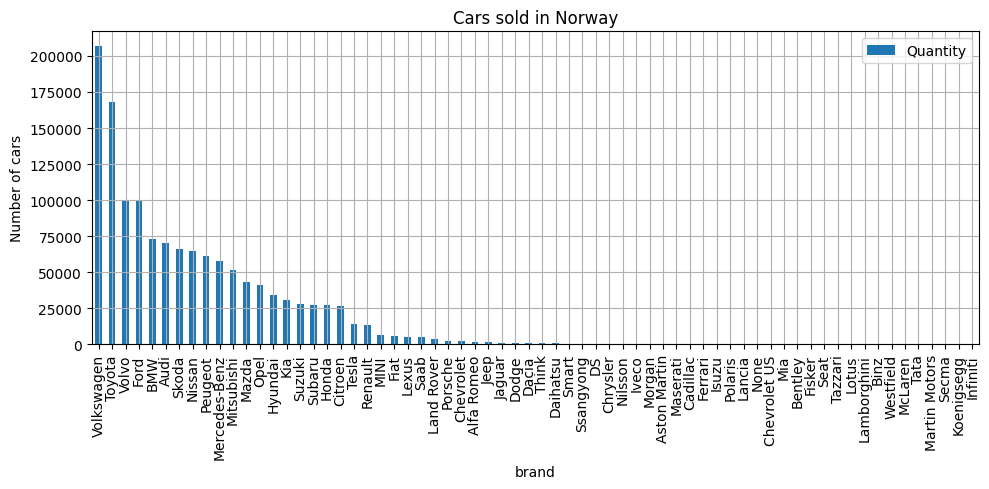

In [5]:
ax = df_quantity_brand.plot(kind='bar',title='Cars sold in Norway',ylabel='Number of cars',figsize=(10,5))
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/norway_by_make.png', dpi=300)

In [6]:
df_quantity_brand.iloc[:10]

,Quantity
brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


In [7]:
df_percentage = df_quantity_brand['Quantity'] / df_quantity_brand['Quantity'].sum() * 100
df_percentage.sum()

np.float64(100.00000000000001)

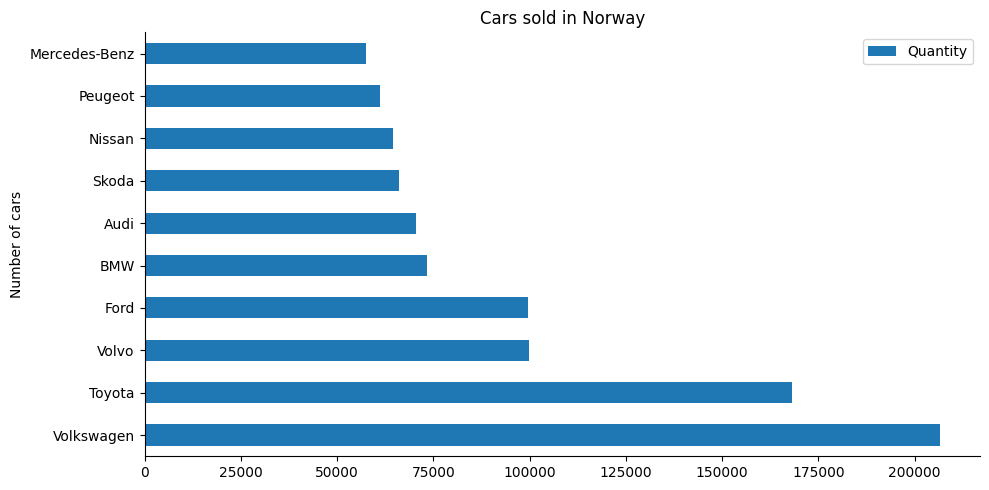

In [8]:
ax = df_quantity_brand.iloc[:10].plot(
    kind='barh',title='Cars sold in Norway',ylabel='Number of cars',figsize=(10,5))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/norway_by_make.png', dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## apply data storytelling

 - remove clutter
 - contrast
 - colors sparingly 
 - descriptive title
 - proximity principle with annotations 
 - percentage insted of absolute values 
 - horizintal bar

In [9]:
df_percentage_top10 = df_percentage.iloc[:10]
colors = [GRAY_1]*len(df_percentage.iloc[:10])
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

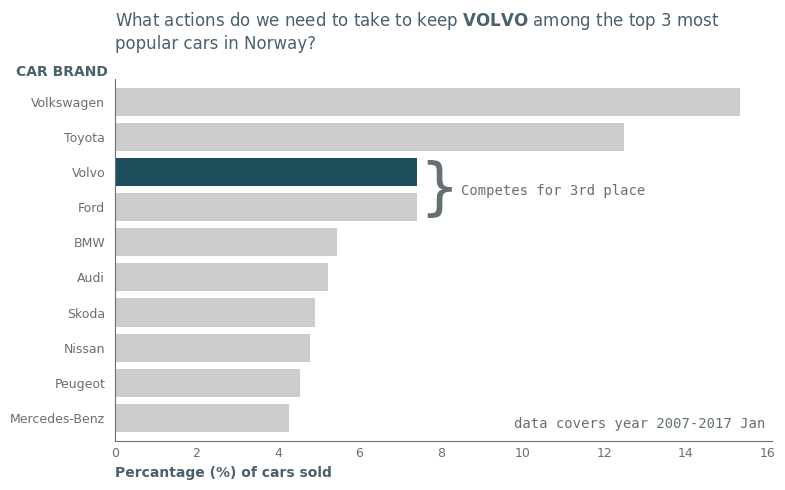

In [10]:
ax = df_percentage_top10.iloc[:10].plot(
    kind='barh',
    ylabel='Number of cars',
    figsize=(8,5),
    width=0.8,
    color = colors)

ax.invert_yaxis()
# remove clutter from the plot

ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_color(GRAY_2)
ax.tick_params(axis='both', colors=GRAY_2,labelsize=9,length= 0,pad = 5)
ax.tick_params(axis = 'y' ,pad = 7)

# Title and labels
ax.set_title("What actions do we need to take to keep "
             +  r"$\bf{VOLVO}$"
             " among the top 3 most\npopular cars in Norway?",
             loc = 'left',
             color = GRAY_3,
             pad = 22)
ax.set_ylabel ('CAR BRAND',color = GRAY_3,fontweight = 'bold',rotation = 0)
ax.set_xlabel ('Percantage (%) of cars sold',color = GRAY_3,fontweight = 'bold',loc = 'left')
ax.yaxis.set_label_coords(-0.08,1)

# annotation proximity principle
ax.annotate(xy = (7.5,3), text= "}",
        fontsize = 45,
        color = GRAY_2,
        family = 'monospace') 
ax.annotate(xy = (8.5,2.64),
        text= "Competes for 3rd place",
        fontsize = 10,
        color = GRAY_2,
        family = 'monospace') 
ax.annotate(xy = (9.8,9.3),
        text = "data covers year 2007-2017 Jan",fontsize = 10,color = GRAY_2,family = 'monospace')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/norway_by_make_top10.png', dpi=300)